In [1]:
import os
import sys
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

sys.path.append('/Applications/OpenFUSIONToolkit/python')
from OpenFUSIONToolkit.TokaMaker import TokaMaker, load_gs_mesh, gs_Domain, read_eqdsk, create_isoflux

from omfit_classes.omfit_eqdsk import boundaryShape

In [2]:
def resize_polygon(points, dx):
    new_points = np.empty(np.shape(points))
    for i in range(np.shape(points)[0]):
        if i==0:
            last = points[-1,:]
            next = points[i+1,:]
        elif i == np.shape(points)[0]-1:
            last = points[i-1,:]
            next = points[0,:]
        else:
            next = points[i+1,:]
            last = points[i-1,:]
        par = points[i,:]-last
        par/= np.linalg.norm(par)
        perp = np.array([par[1], -par[0]])
        temp = points[i,:] + perp*dx
        par_2 = next-points[i,:]
        par_2/= np.linalg.norm(par_2)
        perp_2 = [par_2[1], -par_2[0]]
        new_points[i, :] = temp + dx/np.dot(perp_2,par)*par  + par*dx/np.dot(par_2,perp)*np.dot(par_2,par)
    return new_points

def corners(r,z,dr,dz):
    rs = np.array([r+dr/2, r+dr/2, r-dr/2, r-dr/2, r+dr/2])
    zs = np.array([z+dz/2, z-dz/2, z-dz/2, z+dz/2, z+dz/2])
    return np.column_stack((rs,zs))

r,z,zeff= boundaryShape(kapu = 1.55, kapl = 1.55, delu = -0.4, dell = -0.4, zetail = -.03, zetaiu = -.03, zetaou = -.03, zetaol = -.03, a = 0.413, eps = 0.413/1.0, zoffset = 0, upnull = False, lonull = False, npts = 8)
lim1 = np.column_stack((r,z))

lim2 = resize_polygon(lim1, -0.05)
vv2 = resize_polygon(lim2, 0.01)


In [3]:
coils = {
    'CS0': {'rc': 0.550, 'zc': -.63, 'w': 0.1, 'h': 0.4},
    'CS1': {'rc': 0.550, 'zc': 0, 'w': 0.1, 'h': 0.8},
    'CS2': {'rc': 0.550, 'zc': .63, 'w': 0.1, 'h': 0.4},

    'EF0U': {'rc': .738, 'zc': 0.6, 'w': 0.15, 'h': 0.15},
    'EF1U': {'rc': 1.250, 'zc': 0.74, 'w': 0.175, 'h': 0.175},
    'EF2U': {'rc': 1.450, 'zc': 0.600, 'w': 0.15, 'h': 0.15},
    'EF3U': {'rc': 1.95, 'zc': 0.3, 'w': .175, 'h': .175},

    'EF0L': {'rc': .738, 'zc': -0.6, 'w': 0.15, 'h': 0.15},
    'EF1L': {'rc': 1.250, 'zc': -0.74, 'w': 0.175, 'h': 0.175},
    'EF2L': {'rc': 1.450, 'zc': -0.600, 'w': 0.15, 'h': 0.15},
    'EF3L': {'rc': 1.95, 'zc': -0.3, 'w': .175, 'h': .175},
  
}

In [4]:
## Define mesh resolution in each region
plasma_resolution = 0.02
coil_resolution = 0.04
vv_resolution = 0.03
vac_resolution = 0.075

In [5]:
# Create a G-S domain
gs_mesh = gs_Domain()
# Define region information for mesh
gs_mesh.define_region('air',vac_resolution,'boundary')
gs_mesh.define_region('plasma',plasma_resolution,'plasma')
gs_mesh.define_region('vv',vv_resolution,'conductor',eta=8.67E-7)
# Define each of the coils
for key, coil in coils.items():
    gs_mesh.define_region(key,coil_resolution,'coil')

In [6]:
# Define vaccum vessel geometry
gs_mesh.add_annulus(lim2,'plasma',vv2,'vv',parent_name='air')
# Define the shape of the coils
for key, coil in coils.items():
    gs_mesh.add_rectangle(coil['rc'],coil['zc'],coil['w'],coil['h'],key,parent_name='air')


In [7]:
mesh_pts, mesh_lc, mesh_reg = gs_mesh.build_mesh()
coil_dict = gs_mesh.get_coils()
cond_dict = gs_mesh.get_conductors()

Assembling regions:
  # of unique points    = 574
  # of unique segments  = 50
Generating mesh:
  # of points  = 4175
  # of cells   = 8232
  # of regions = 14


#----------------------------------------------
OpenFUSIONToolkit Initialized
Development branch:   main
Revision id:          11ca7a7
Parallelization Info:
  Not compiled with MPI
  # of OpenMP threads =    2
Fortran input file    = oftpyin                                                                         
XML input file        = none                                                                            
Integer Precisions    =    4   8
Float Precisions      =    4   8  16
Complex Precisions    =    4   8
LA backend            = native
#----------------------------------------------


**** Generating surface grid level  1
  Generating boundary domain linkage
  Mesh statistics:
    Area         =  4.870E+00
    # of points  =    4175
    # of edges   =   12406
    # of cells   =    8232
    # of boundary points =     116
    # of boundary edges  =     116
    # of boundary cells  =     116
  Resolution statistics:
    hmin =  1.000E-02
    hrms =  3.924E-02
    hmax =  1.119

 "none"
Flux surfaces from 600x600 gEQDSK
Levels based on psi ...
Grid diagonal resolution: 0.0025365011216131003 [m]
Cropping tables ...
Find magnetic axis ...
Find separatrix ...
Tracing flux surfaces ...
  > Took 0:00:02.217071
Find Br, Bz, F on flux surfaces ...
  > Took 0:00:01.003143
Flux surface averaging ...
  > Took 0:00:01.261200
Geometric quantities ...
  > Took 0:00:02.816494
[ 1.07706319 -0.38718392]
[1.0770799  0.38721931]
bye
#----------------------------------------------
OpenFUSIONToolkit Initialized
Development branch:   main
Revision id:          11ca7a7
Parallelization Info:
  Not compiled with MPI
  # of OpenMP threads =    2
Fortran input file    = oftpyin                                                                         
XML input file        = none                                                                            
Integer Precisions    =    4   8
Float Precisions      =    4   8  16
Complex Precisions    =    4   8
LA backend            = native
#

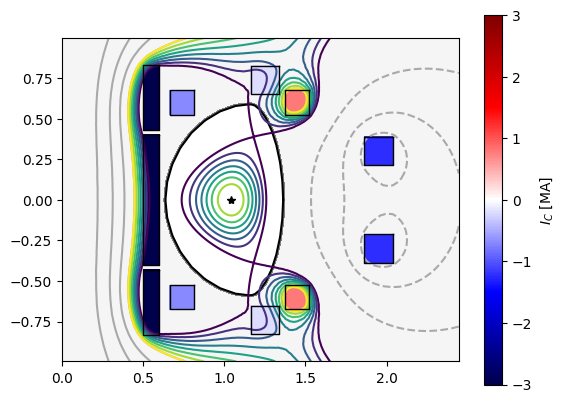

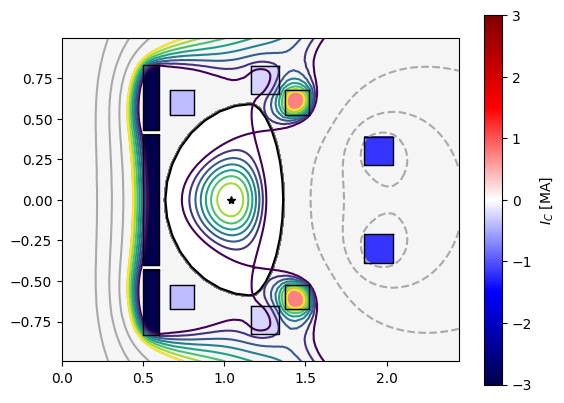

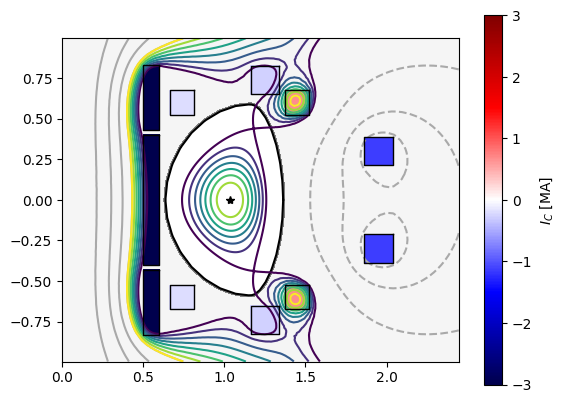

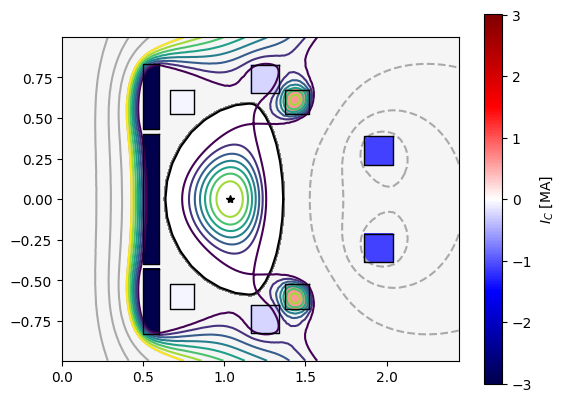

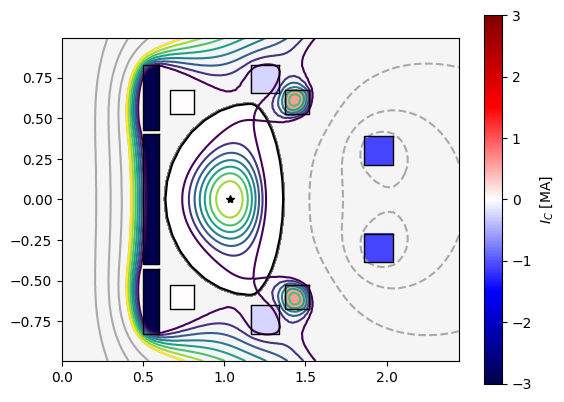

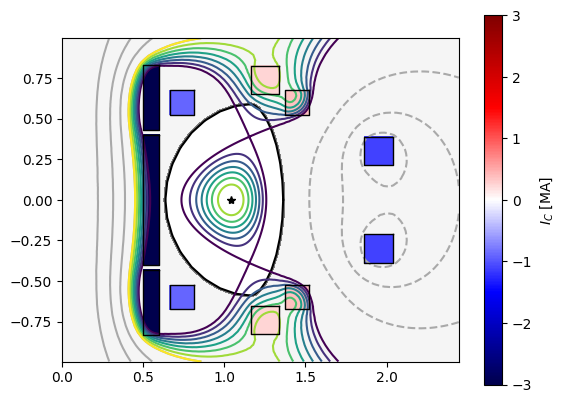

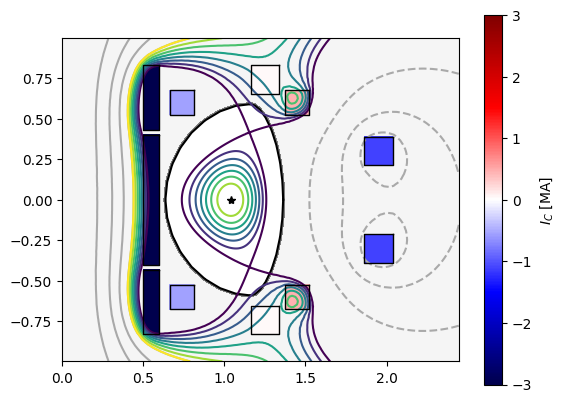

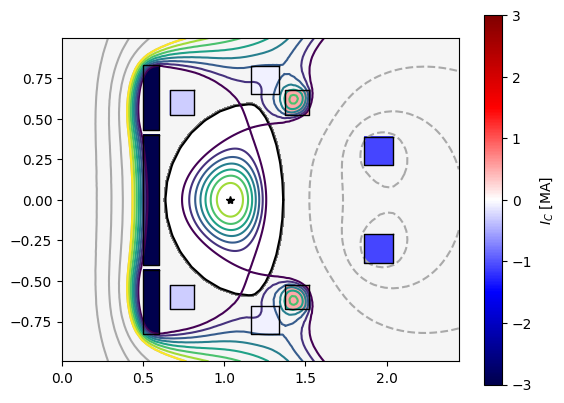

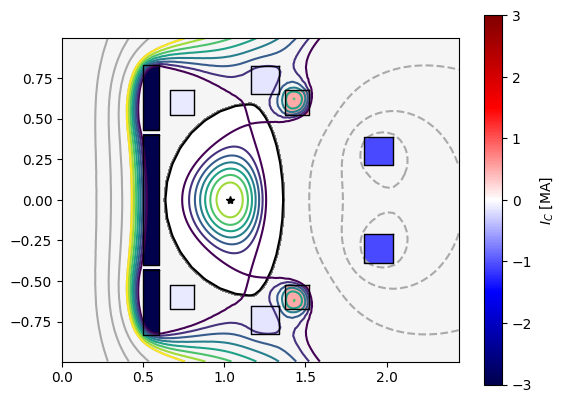

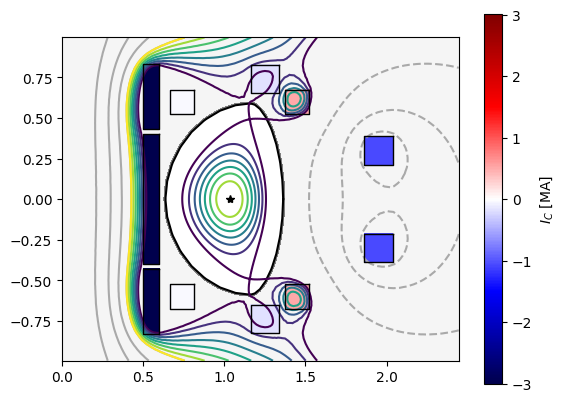

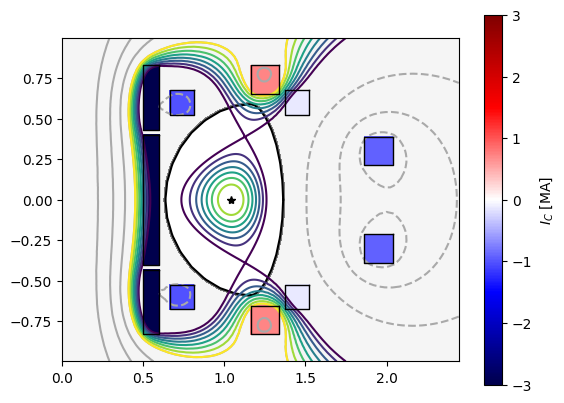

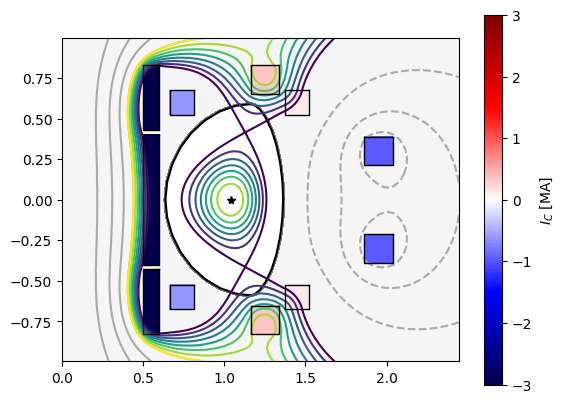

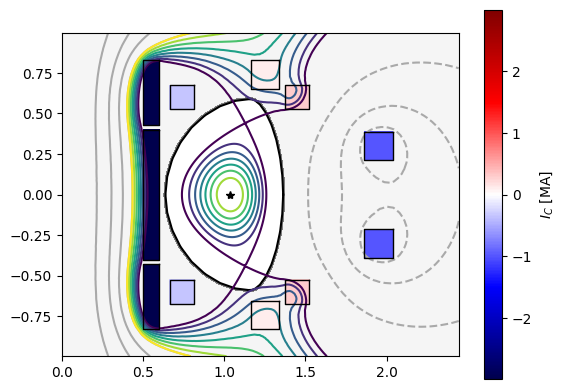

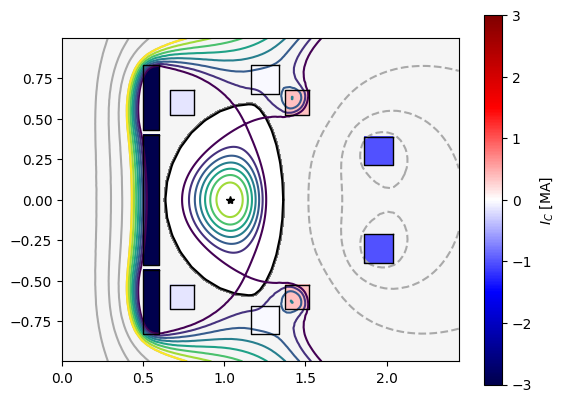

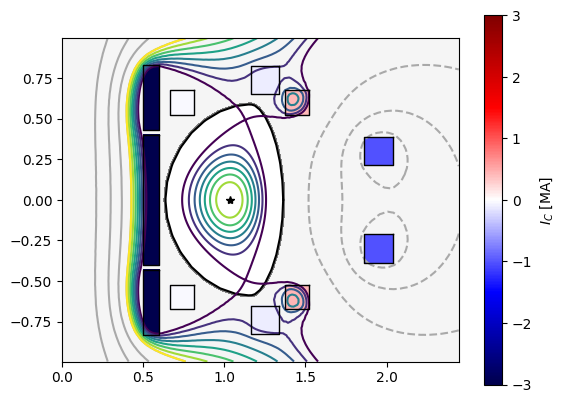

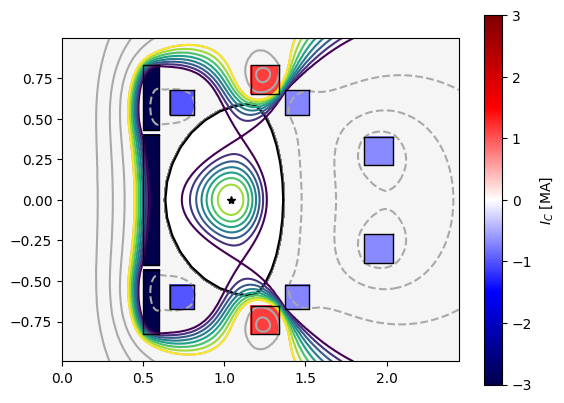

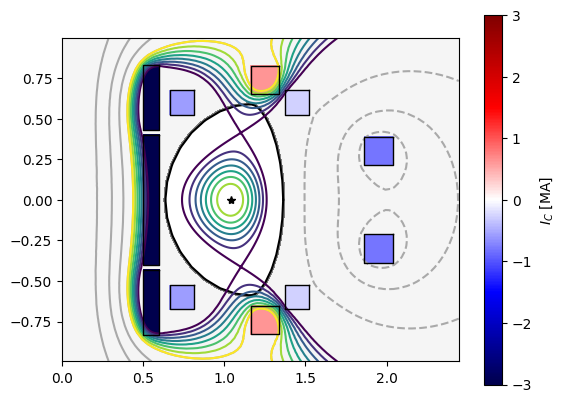

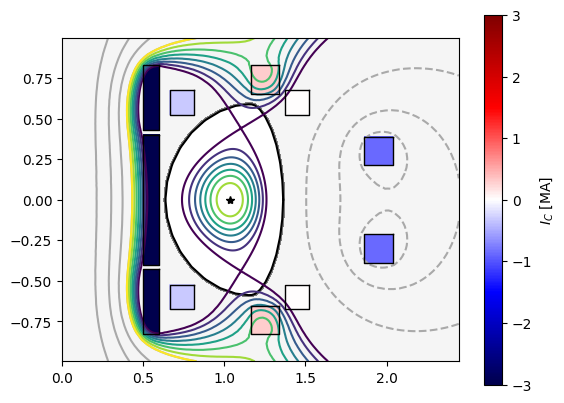

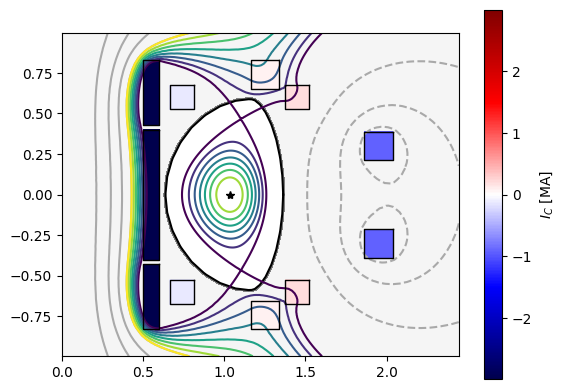

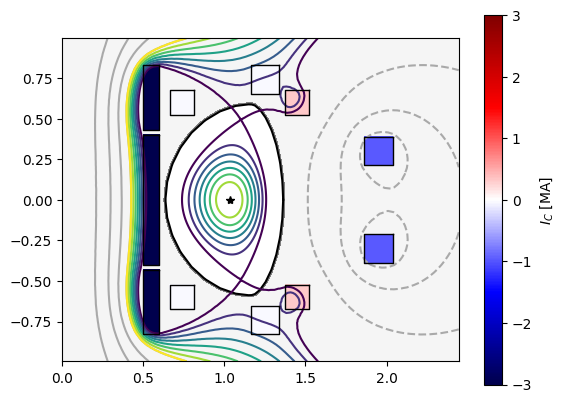

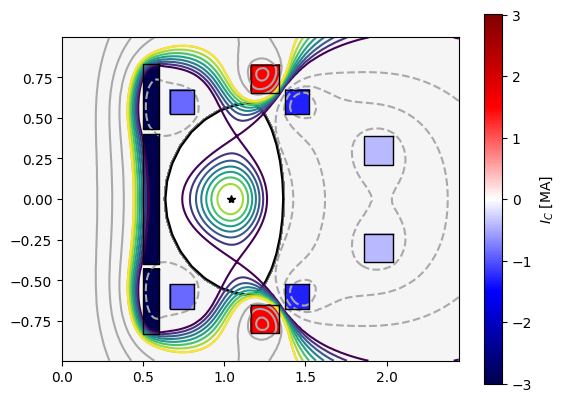

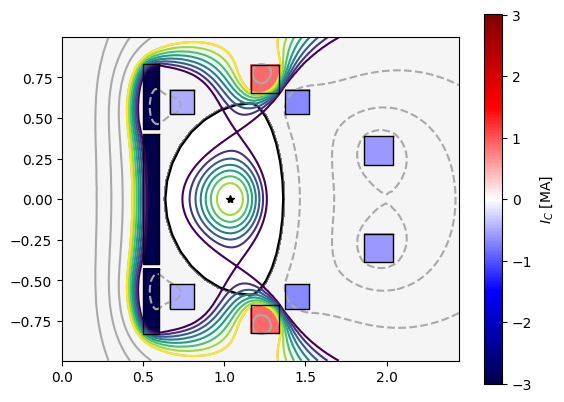

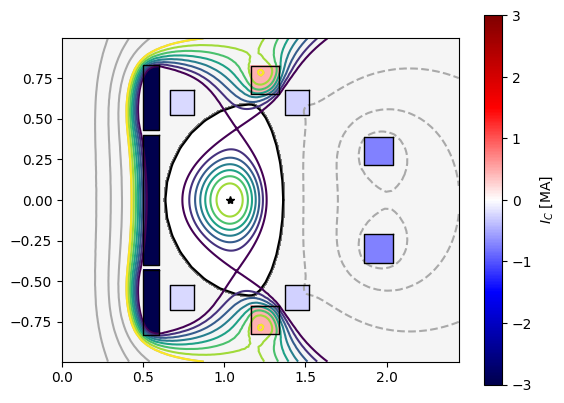

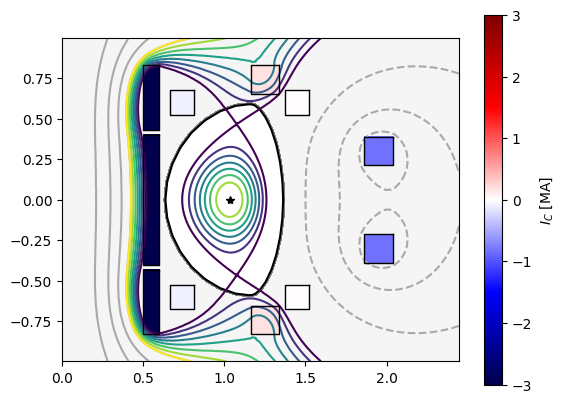

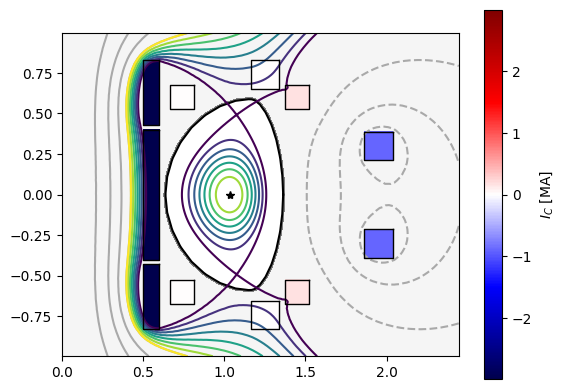

In [8]:
import copy
from omfit_classes.omfit_eqdsk import OMFITgeqdsk
d_omfit = []
e_omfit = []
d_tok = []
e_tok = []
q95 = []
betap = []
li = []
coil_currents = []
ds = np.linspace(-0.7, -.3, 5)
es = np.linspace(1.5, 1.9, 5)
dist = []
gammas = []
taus = []
eqdsks = []
lcfs = []
area = []


for d in ds: 
    for e in es:
        mygs = TokaMaker()
        mygs.setup_mesh(mesh_pts, mesh_lc, mesh_reg)
        mygs.setup_regions(cond_dict=cond_dict)
        mygs.setup(order = 2, F0 =0.8*3) ## F0 = B0 * R0

        coil_reg_mat = np.zeros((mygs.ncoils+1,mygs.ncoils+1), dtype=np.float64)
        targets = np.zeros(mygs.ncoils+1)
        coil_weights = 0.5*np.ones(mygs.ncoils+1)

        #Set target values for CS coils
        coil_reg_mat[0,0] = 1
        coil_reg_mat[1,1] = 1
        coil_reg_mat[2,2] = 1
        targets[0] = -3E6
        targets[1] = -3E6
        targets[2] = -3E6

        #Enforce up/down symmetry in PF coils
        coil_reg_mat[3,3] = 1
        coil_reg_mat[3,7] = -1
        coil_reg_mat[4,4] = 1
        coil_reg_mat[4,8] = -1
        coil_reg_mat[5,5] = 1
        coil_reg_mat[5,9] = -1
        coil_reg_mat[6,6] = 1
        coil_reg_mat[6,10] = -1
        mygs.set_coil_reg(coil_reg_mat, targets, coil_weights)

        #Set upper bound on coil currents
        coil_bounds = np.zeros((mygs.ncoils+1,2), dtype=np.float64)
        coil_bounds[:,0] = -1.E11; coil_bounds[:,1] = 1.E11
        mygs.set_coil_bounds(coil_bounds)

        # Define shape of P' anf FF' profiles
        n_sample = 40
        psi_sample = np.linspace(0.0,1.0,n_sample)
        # Set F*F' profile
        alpha = 2
        gamma = 3
        ffp_prof = {
            'type': 'linterp',
            'x': psi_sample,
            'y': np.power(1.0-np.power(psi_sample,alpha),gamma)
        }
        ffp_prof['y'] /= ffp_prof['y'][0] # Normalize profile (not required but convienient)
        # Set P' profile
        alpha = 2
        gamma = 3
        pp_prof = {
            'type': 'linterp',
            'x': psi_sample,
            'y': np.power(1.0-np.power(psi_sample,alpha),gamma)
        }
        pp_prof['y'] /= pp_prof['y'][0] # Normalize profile (not required but convienient)

        mygs.set_profiles(ffp_prof=ffp_prof,pp_prof=pp_prof)

        # set global targets
        Ip_target = 1E6
        mygs.set_targets(Ip = Ip_target, Ip_ratio=1.0)

        # set boundary/saddle point targets
        r, z, zeff = boundaryShape(kapu = e, kapl = e, delu = d, dell = d, zetail = 0, zetaiu = 0, zetaou = 0, zetaol = 0, a = 0.2588, eps = 0.2588/1, zoffset = 0, upnull = True, lonull = True, npts = 8)
        boundary = np.column_stack((r,z))
        boundary = np.nan_to_num(boundary)
        x_points = np.zeros((2,2))
        x_points[0,:] = boundary[np.argmin(boundary[:,1]),:]
        x_points[1,:] = boundary[np.argmax(boundary[:,1]),:]
        x_weights = 5*np.ones(2)
        mygs.set_saddles(x_points, x_weights)
        isoflux_weights = 10*np.ones(32)

      
        
        mygs.set_isoflux(boundary, isoflux_weights)

        #find equilibrium
        mygs.init_psi(0.68,0,0.2, 1.8,0.3)
        mygs.settings.maxits = 100
        mygs.update_settings()
        mygs.solve()

        #plot equilibrium
        fig, ax = plt.subplots(1,1)
        mygs.plot_machine(fig,ax,coil_colormap='seismic',coil_symmap=True,coil_scale=1.E-6,coil_clabel=r'$I_C$ [MA]')
        mygs.plot_psi(fig,ax,xpoint_color=None,vacuum_nlevels=4)
        
        for key, coil in coils.items():
            plt.plot(corners(coil['rc'],coil['zc'],coil['w'],coil['h'])[:,0],corners(coil['rc'],coil['zc'],coil['w'],coil['h'])[:,1], color = 'k', linewidth = 1)

        #save as eqdsk
        mygs.save_eqdsk('temp', lcfs_pad = .001, nr = 600, nz = 600)

        eqdsk = OMFITgeqdsk('temp')
        d_omfit.append(eqdsk['fluxSurfaces']['geo']['delta'][-1])    
        e_omfit.append(eqdsk['fluxSurfaces']['geo']['kap'][-1])
        area.append(eqdsk['fluxSurfaces']['geo']['CXarea'][-1])
        
        

        lcfs.append(read_eqdsk('temp')['rzout'])
        stats = mygs.get_stats()
        q95.append(stats['q_95'])
        betap.append(stats['beta_pol'])
        li.append(stats['l_i'])
        d_tok.append(stats['delta'])
        e_tok.append(stats['kappa'])

        eig_vals, eig_vecs = mygs.eig_td(-1.E5,10, include_bounds = True)
        gammas.append(eig_vals[0,0])

        eig_wall, eigvec_wall = mygs.eig_wall()
        taus.append(1/eig_wall[1][0])

        #extract coil currents
        current,currentmap = mygs.get_coil_currents()
        coil_currents.append(current)
        mygs.reset()
        

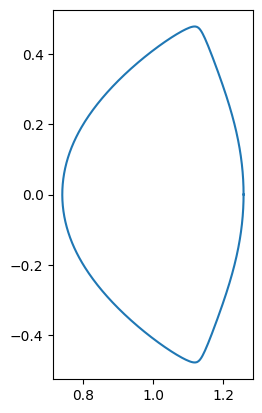

In [29]:

ind = 14
plt.plot(lcfs[ind][:,0], lcfs[ind][:,1])
plt.gca().set_aspect(aspect = 1)

In [32]:
#print(d_omfit[ind])
#print(e_omfit[ind])
print(repr(lcfs[ind][:,1]))

array([-7.88864786e-18,  2.34027278e-03,  4.68083306e-03,  7.02195370e-03,
        9.36396050e-03,  1.17070968e-02,  1.40516667e-02,  1.63979598e-02,
        1.87462642e-02,  2.10968679e-02,  2.34500591e-02,  2.58061259e-02,
        2.81653045e-02,  3.05279973e-02,  3.28948139e-02,  3.52656175e-02,
        3.76406536e-02,  4.00201836e-02,  4.24045387e-02,  4.47942160e-02,
        4.71895306e-02,  4.95907938e-02,  5.19983173e-02,  5.44124063e-02,
        5.68334022e-02,  5.92613751e-02,  6.16970895e-02,  6.41405989e-02,
        6.65922087e-02,  6.90522142e-02,  7.15209209e-02,  7.39991593e-02,
        7.64866554e-02,  7.89836419e-02,  8.14904160e-02,  8.40078065e-02,
        8.65363663e-02,  8.90764520e-02,  9.16284199e-02,  9.41926257e-02,
        9.67690866e-02,  9.93575919e-02,  1.01959424e-01,  1.04574989e-01,
        1.07204642e-01,  1.09848870e-01,  1.12507473e-01,  1.15180804e-01,
        1.17870105e-01,  1.20575819e-01,  1.23298328e-01,  1.26037882e-01,
        1.28794146e-01,  

In [12]:
print(area)

[0.28021838200403615, 0.30181260685282, 0.32239924499803374, 0.34069892054555734, 0.35787475894783966, 0.2717542745998025, 0.29212088369775346, 0.3118184126797224, 0.329904860680237, 0.3467299201805892, 0.26736411789906334, 0.2881752954138011, 0.3074585592947936, 0.3254599455978615, 0.34220058576493595, 0.2646486867443928, 0.28527531014799573, 0.3048742588314551, 0.32301520122121063, 0.33988018481218363, 0.26307128483133435, 0.2832105482444871, 0.30205191323778335, 0.32167036458488635, 0.33962221180974456]


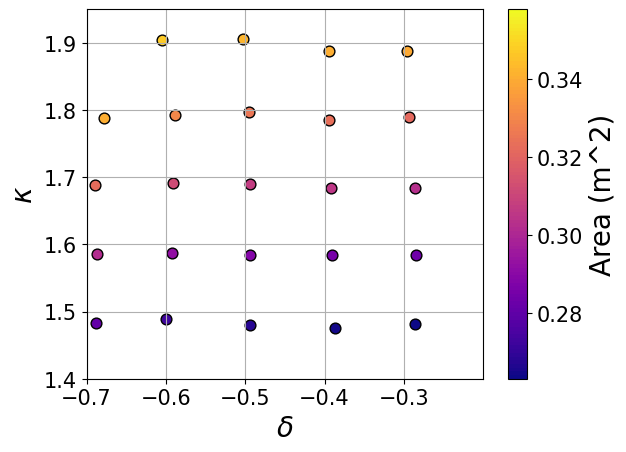

In [14]:

norm = plt.Normalize(np.min(area), np.max(area))
cmap = mpl.cm.plasma(np.linspace(0,1,100))
cmap = mpl.colors.ListedColormap(cmap[:,:-1])
c = cmap(norm(area))
for i in range(25):
    if i is not 4:
        plt.scatter(d_omfit[i], e_omfit[i], color = c[i], edgecolors = 'k', s = 60)
plt.xlabel(r'$\delta$', size = 20)
plt.ylabel(r'$\kappa$', size = 20)
plt.xlim([-0.7, -0.2])
plt.ylim([1.4, 1.95])
plt.xticks(np.linspace(-0.7, -0.3, 5),size = 15)
plt.yticks(size = 15)
plt.grid()
sm = plt.cm.ScalarMappable(cmap=cmap, norm = norm)
cb = plt.colorbar(sm)
cb.set_label(label=r'Area (m^2)', size = 20)
cb.ax.tick_params(labelsize=15)

In [9]:
print(taus)
#2.1
#3.2

[0.003223975413225502, 0.0032239754132254916, 0.0032239754132255124, 0.003223975413225501, 0.0032239754132255085, 0.003223975413225514, 0.0032239754132255094, 0.003223975413225507, 0.0032239754132255137, 0.003223975413225502, 0.0032239754132255215, 0.003223975413225498, 0.0032239754132255007, 0.003223975413225511, 0.003223975413225506, 0.0032239754132255107, 0.0032239754132255068, 0.0032239754132255094, 0.003223975413225502, 0.0032239754132255007, 0.0032239754132255094, 0.0032239754132255155, 0.003223975413225511, 0.0032239754132255003, 0.0032239754132255055]


In [10]:
coil_currents = np.array(coil_currents)

In [11]:
print(np.min(coil_currents[:,6]))

-1242216.8841772838


[-0.68095431 -0.39136515 -0.19409206 -0.06492317  0.017501   -0.91394772
 -0.54778591 -0.29954913 -0.13613769 -0.03282572 -1.02149525 -0.61196857
 -0.3371259  -0.1582489  -0.04627933 -1.00033024 -0.58226927 -0.31109412
 -0.13577826 -0.02587731 -0.88384338 -0.48330854 -0.22872374 -0.071662
  0.02051313]


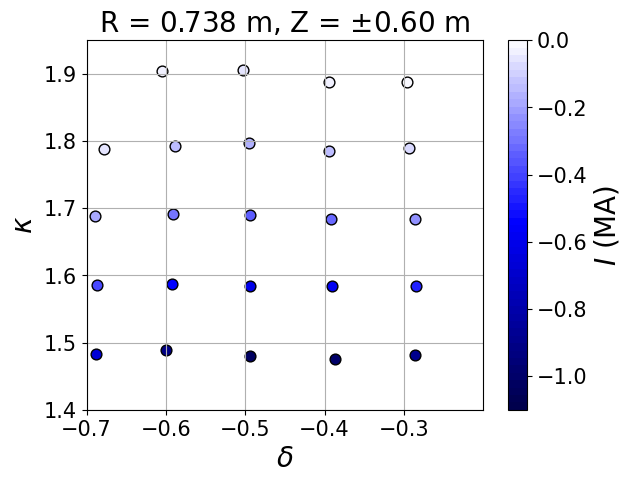

In [19]:

norm = plt.Normalize(-1.1, 0)
cmap = mpl.cm.seismic(np.linspace(0,1,100))
cmap = mpl.colors.ListedColormap(cmap[:50,:-1])
c = cmap(norm(coil_currents[:,3]/1E6))
print(coil_currents[:,3]/1E6)
for i in range(25):
    if i is not 4:
        plt.scatter(d_omfit[i], e_omfit[i], color = c[i], edgecolors = 'k', s = 60)
plt.xlabel(r'$\delta$', size = 20)
plt.ylabel(r'$\kappa$', size = 20)
plt.xlim([-0.7, -0.2])
plt.ylim([1.4, 1.95])
plt.xticks(np.linspace(-0.7, -0.3, 5),size = 15)
plt.yticks(size = 15)
plt.grid()
plt.title(r'R = 0.738 m, Z = $\pm$0.60 m', size = 20)
sm = plt.cm.ScalarMappable(cmap=cmap, norm = norm)
cb = plt.colorbar(sm)
cb.set_label(label=r'$I$ (MA)', size = 20)
cb.ax.tick_params(labelsize=15)

[-0.18774036 -0.24562554 -0.26128493 -0.2539822  -0.23607451  0.25415109
  0.03944955 -0.08251988 -0.14493266 -0.17217409  0.70911654  0.32956331
  0.10196101 -0.03174481 -0.10660637  1.14859537  0.61440781  0.28452637
  0.08190907 -0.0416542   1.54608349  0.87550698  0.45251506  0.18651098
  0.01946311]


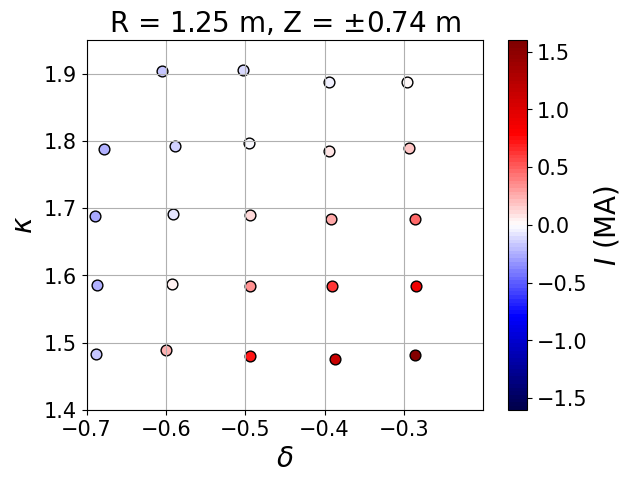

In [20]:

norm = plt.Normalize(-1.6, 1.6)
cmap = mpl.cm.seismic(np.linspace(0,1,100))
cmap = mpl.colors.ListedColormap(cmap[:,:-1])
c = cmap(norm(coil_currents[:,4]/1E6))

print(coil_currents[:,4]/1E6)

for i in range(25):
    if i is not 4:
        plt.scatter(d_omfit[i], e_omfit[i], color = c[i], edgecolors = 'k', s = 60)
plt.xlabel(r'$\delta$', size = 20)
plt.ylabel(r'$\kappa$', size = 20)
plt.xlim([-0.7, -0.2])
plt.ylim([1.4, 1.95])
plt.xticks(np.linspace(-0.7, -0.3, 5),size = 15)
plt.yticks(size = 15)
plt.grid()
plt.title(r'R = 1.25 m, Z = $\pm$0.74 m', size = 20)
sm = plt.cm.ScalarMappable(cmap=cmap, norm = norm)
cb = plt.colorbar(sm)
cb.set_label(label=r'$I$ (MA)', size = 20)
cb.ax.tick_params(labelsize=15)

[ 0.78194769  0.73464983  0.67770784  0.62127649  0.57001863  0.37012187
  0.46368898  0.50612411  0.51599191  0.51020745 -0.13808086  0.12567109
  0.2814963   0.37192176  0.42183946 -0.71153219 -0.26398263  0.01703312
  0.1949313   0.30977443 -1.31503442 -0.68183182 -0.26879266  0.00178059
  0.18090063]


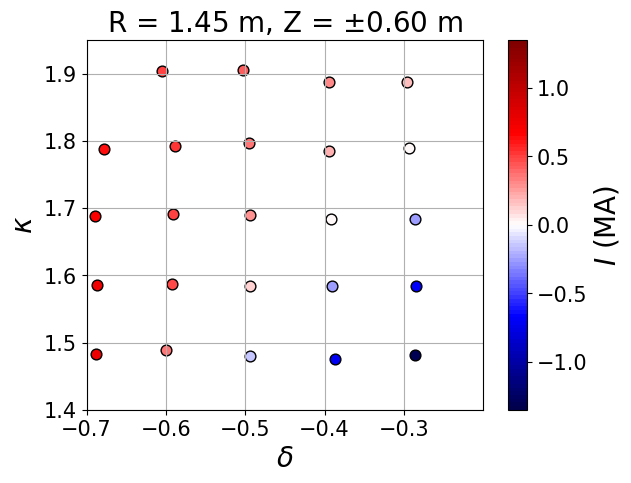

In [14]:

norm = plt.Normalize(-1.35, 1.35)
cmap = mpl.cm.seismic(np.linspace(0,1,100))
cmap = mpl.colors.ListedColormap(cmap[:,:-1])
c = cmap(norm(coil_currents[:,5]/1E6))
print(coil_currents[:,5]/1E6)

for i in range(25):
    if i is not 4:
        plt.scatter(d_omfit[i], e_omfit[i], color = c[i], edgecolors = 'k', s = 60)
plt.xlabel(r'$\delta$', size = 20)
plt.ylabel(r'$\kappa$', size = 20)
plt.xlim([-0.7, -0.2])
plt.ylim([1.4, 1.95])
plt.xticks(np.linspace(-0.7, -0.3, 5),size = 15)
plt.yticks(size = 15)
plt.title(r'R = 1.45 m, Z = $\pm$0.60 m', size = 20)
plt.grid()
sm = plt.cm.ScalarMappable(cmap=cmap, norm = norm)
cb = plt.colorbar(sm)
cb.set_label(label=r'$I$ (MA)', size = 20)
cb.ax.tick_params(labelsize=15)

[-1.24221688 -1.1893224  -1.14602191 -1.11117743 -1.0840372  -1.12268585
 -1.10797597 -1.0929923  -1.07799319 -1.06581544 -0.93715961 -0.9782469
 -1.00285534 -1.01743755 -1.02636515 -0.69677768 -0.80792705 -0.88172415
 -0.93211055 -0.96853317 -0.41575445 -0.60647553 -0.73846456 -0.83074206
 -0.89646628]


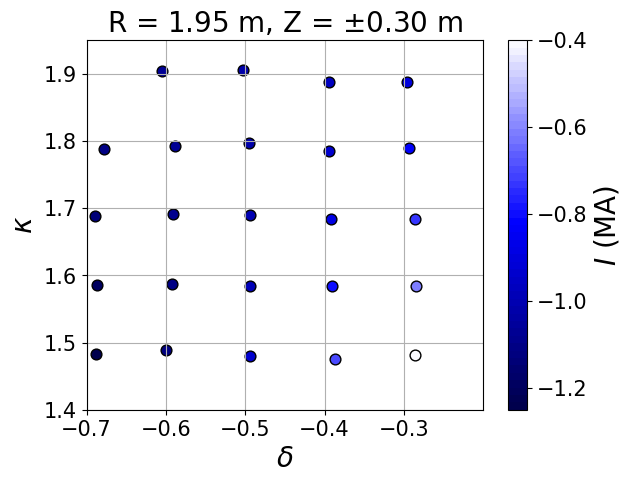

In [21]:

norm = plt.Normalize(-1.25, -.4)
cmap = mpl.cm.seismic(np.linspace(0,1,100))
cmap = mpl.colors.ListedColormap(cmap[:50,:-1])
c = cmap(norm(coil_currents[:,6]/1E6))
print(coil_currents[:,6]/1E6)
for i in range(25):
    if i is not 4:
        plt.scatter(d_omfit[i], e_omfit[i], color = c[i], edgecolors = 'k', s = 60)
plt.xlabel(r'$\delta$', size = 20)
plt.ylabel(r'$\kappa$', size = 20)
plt.xlim([-0.7, -0.2])
plt.ylim([1.4, 1.95])
plt.xticks(np.linspace(-0.7, -0.3, 5),size = 15)
plt.yticks(size = 15)
plt.title(r'R = 1.95 m, Z = $\pm$0.30 m', size = 20)
plt.grid()
sm = plt.cm.ScalarMappable(cmap=cmap, norm = norm)
cb = plt.colorbar(sm, ticks = [-0.4, -0.6, -0.8, -1.0, -1.2])
cb.set_label(label=r'$I$ (MA)', size = 20)
cb.ax.tick_params(labelsize=15)

In [16]:
print(taus[0]*1000)

3.223975413225502


In [22]:
print(coil_currents[:,0]/1E6)

[-2.9970846  -2.99905713 -3.00013974 -2.9998542  -2.99735944 -2.99446573
 -2.99665655 -2.99738442 -2.99697444 -2.99388474 -2.99628677 -2.99681027
 -2.99749272 -2.99623159 -2.99303714 -3.00136897 -3.00168354 -3.00006837
 -2.9975166  -2.99325678 -3.00592896 -3.00614305 -3.00453308 -3.00051993
 -2.99375474]
